# Data Analytics Project

## Heart Failure Classification

Dataset provided by [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

### 1. Data Dictionary

| Variable | Description |
| -------- | ----------- |
| Age | Age of the patient in years |
| Sex | Sex of the patient (M or F) |
| ChestPainType | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP | Resting blood pressure [mmHg] |
| Cholesterol | Serum cholesterol [mm/dl] |
| FastingBS | Fasting blood sugar [1 if FastingBS > 120 mg/dl, 0 if otherwise] | 
| RestingECG | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR | Maximum heart rate achieved [Numeric value between 60 and 202] |
| ExerciseAngina | Exercise-induced angina [Y: Yes, N: No] |
| Oldpeak | Oldpeak = ST [Numeric value measured in depression] |
| ST_Slope | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| HeartDisease | Output class [1: heart disease, 0: Normal] |


### 2. Data Exploration

In [58]:
# data wrangling and visualisation libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn 

# prevents warnings from happening
import warnings 
warnings.simplefilter('ignore', category=UserWarning)

# makes plots pretty in jupyternotebook
%matplotlib inline

df = pd.read_csv('heart.csv')

In [59]:
print(f"There are {len(df.columns)} columns in the DataFrame:")
for column in list(df.columns):
    print(' ', column)
print()
print(f"There are {df.shape[0]} rows in the DataFrame.")

There are 12 columns in the DataFrame:
  Age
  Sex
  ChestPainType
  RestingBP
  Cholesterol
  FastingBS
  RestingECG
  MaxHR
  ExerciseAngina
  Oldpeak
  ST_Slope
  HeartDisease

There are 918 rows in the DataFrame.


The first five rows of the DataFrame are as follows:

In [60]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Here is a description of the 7 numerical variables:

In [61]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The creator of the dataset has already 'cleaned' it in the sense that there are no null values and the data types are correct for each variable. 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Distributions of Categorical Variables

In [68]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


**Sex**: The distribution is very imbalanced. Males make up 78.976% the distribution, and the remaining 21.024% is females.

In [63]:
print('Values and counts for Sex:')
print(df['Sex'].value_counts())
print('Values and counts for Sex, normalize:')
print(df['Sex'].value_counts(normalize=True))

Values and counts for Sex:
M    725
F    193
Name: Sex, dtype: int64
Values and counts for Sex, normalize:
M    0.78976
F    0.21024
Name: Sex, dtype: float64


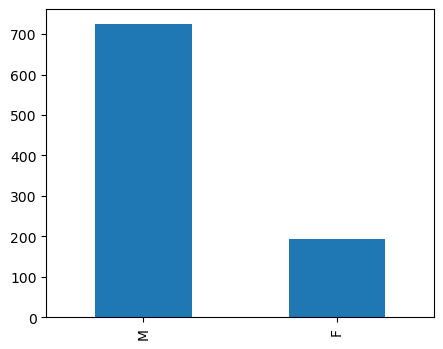

In [66]:
df['Sex'].value_counts().plot.bar(figsize = (5, 4)) 
plt.show()

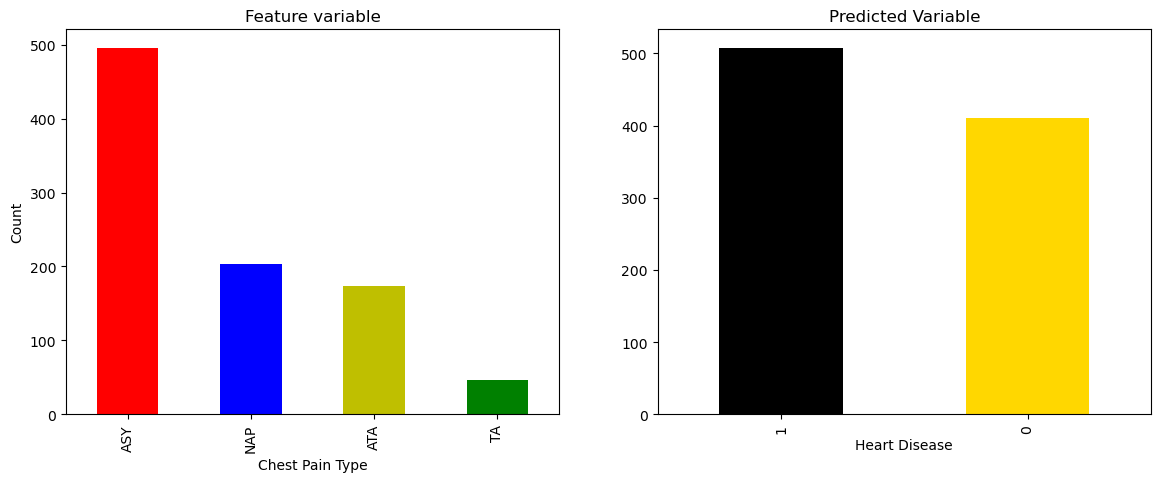

In [76]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 5))
df['ChestPainType'].value_counts().plot(ax = axes[0], kind='bar', title='Feature variable', color=['r', 'b', 'y', 'g'], ylabel='Count', xlabel='Chest Pain Type')
df['HeartDisease'].value_counts().plot(ax=axes[1], kind='bar', title='Predicted Variable', color=['black', 'gold'], xlabel='Heart Disease')
plt.show()

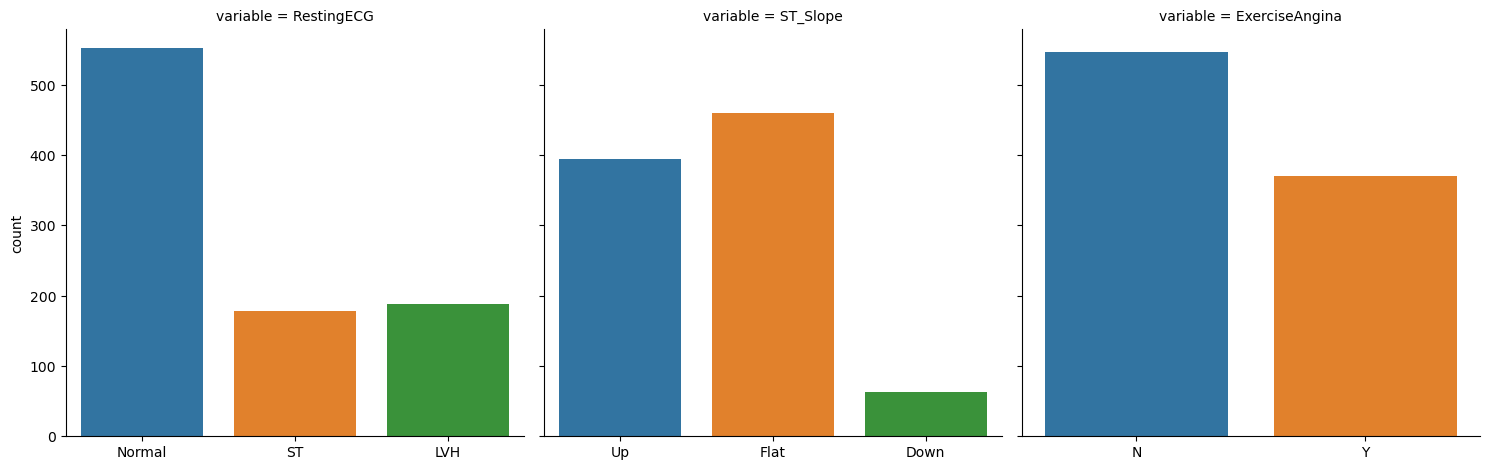

In [77]:
minidata = pd.melt(df[['RestingECG', 'ST_Slope', 'ExerciseAngina']])
g = sns.catplot(data=minidata, kind='count', col='variable', x='value', y=None, sharex=False)
g.set_axis_labels(x_var='')
plt.show()

#### Distributions of Continuous Variables

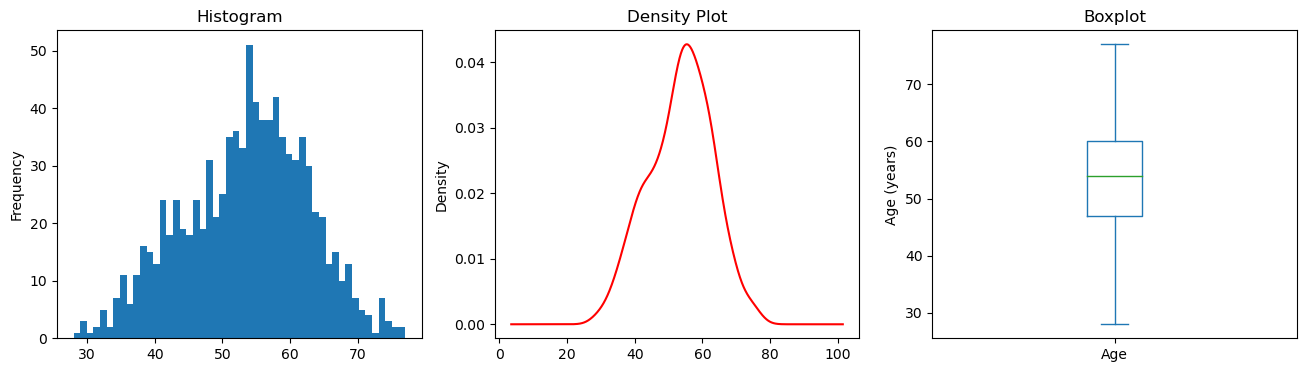

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4)) 
df['Age'].plot(kind='hist', bins=50, ax=axes[0], xlabel='Age (years)', title='Histogram')
df['Age'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['Age'].plot(kind='box', ax=axes[2], ylabel='Age (years)', xlabel='', title='Boxplot')
plt.show()

#### Bivariate Analysis

In [83]:
sex_hd = pd.crosstab(df['Sex'], df['HeartDisease'])
sex_hd_norm = pd.crosstab(df['Sex'], df['HeartDisease'], normalize=True)
print(sex_hd)
print(sex_hd_norm)

HeartDisease    0    1
Sex                   
F             143   50
M             267  458
HeartDisease         0         1
Sex                             
F             0.155773  0.054466
M             0.290850  0.498911


In [87]:
chestpain_hd = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
print(chestpain_hd)
chestpain_hd_norm = pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize=True)
print(chestpain_hd_norm)


HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20
HeartDisease          0         1
ChestPainType                    
ASY            0.113290  0.427015
ATA            0.162309  0.026144
NAP            0.142702  0.078431
TA             0.028322  0.021786


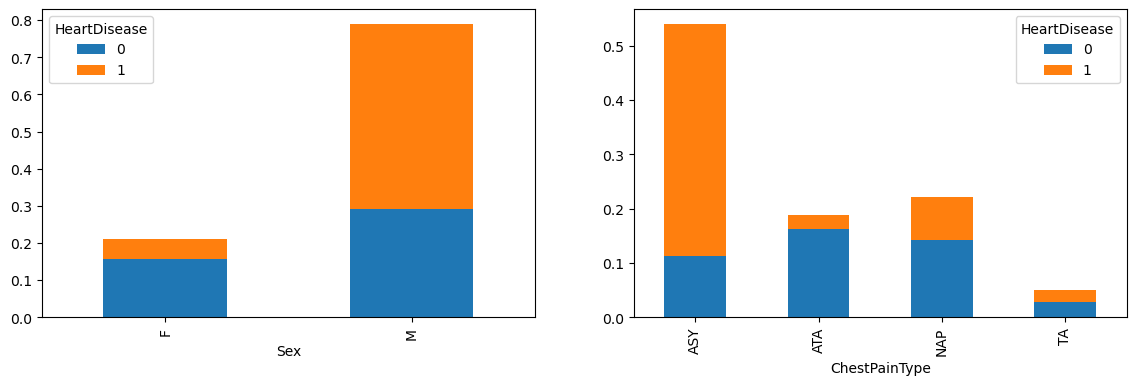

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sex_hd_norm.plot(kind='bar', stacked=True, ax=axes[0])
chestpain_hd_norm.plot(kind='bar', stacked=True, ax=axes[1])
plt.show()

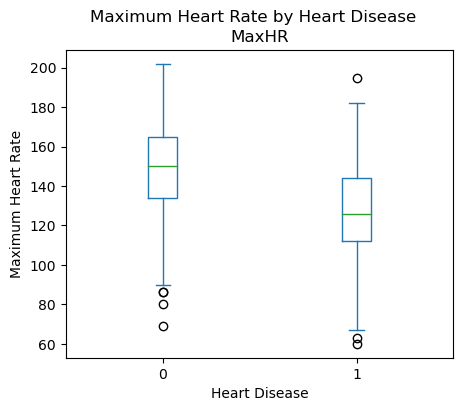

In [90]:
df.plot(column='MaxHR', by='HeartDisease', kind='box', subplots=False, xlabel='Heart Disease', ylabel='Maximum Heart Rate', title='Maximum Heart Rate by Heart Disease', figsize=(5,4))
plt.xlabel('Heart Disease')
plt.show()